In [1]:
%cd ..

/root/autobounds


In [2]:
from autobounds.causalProblem import causalProblem
from autobounds.DAG import DAG
from copy import deepcopy

import pandas as pd
import networkx as nx
import plotnine as pn
import numpy as np
import matplotlib.pyplot as plt
import io
import timeit
import time 

In [3]:
def print_bounds(prog_optim):
    print("==========================")
    (
    print(f"Causal effect lies in the interval [{np.round(prog_optim[0]['dual'], 3)}, "
      f"{np.round(prog_optim[1]['dual'], 3)}]")
    )

# Section 1: Data

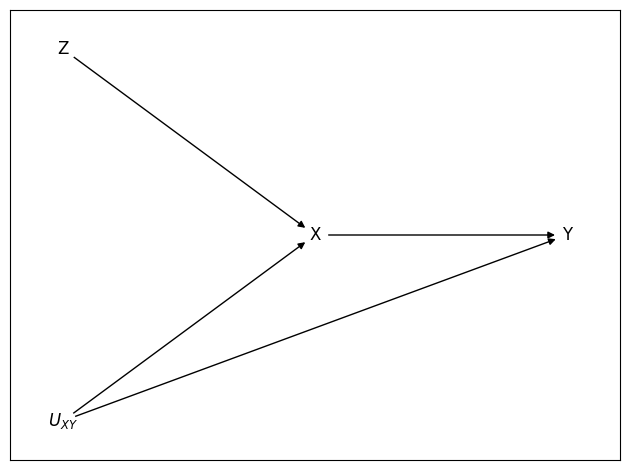

In [4]:
# Standard IV DAG
dag = DAG()
dag.from_structure("Z -> X, X -> Y, Uxy -> X, Uxy -> Y", unob = "Uxy")
dag.plot()

In [15]:
# all binary
datafile = io.StringIO('''X,Y,Z,prob
0,0,0,0.125
0,0,1,0.125
0,1,0,0.125
0,1,1,0.125
1,0,0,0.125
1,0,1,0.125
1,1,0,0.125
1,1,1,0.125''')

comp_data = [ ] # to use for comparison

In [16]:
start_time1 = timeit.default_timer()
problem1 = causalProblem(dag)
problem1.add_prob_constraints()
problem1.load_data(datafile, optimize = False)
problem1.set_ate('X','Y')
program1 = problem1.write_program().run_scip()
print_bounds(program1)

final_time1 = timeit.default_timer() - start_time1
comp_data.append({'problem': 'X binary, Y binary, Z binary', 'time': final_time1})
print(f'Problem 1 -- Time: {final_time1}')

LOWER BOUND: # -- Primal: -0.5 / Dual: -0.5 / Time: * 0.0 ##
UPPER BOUND: # -- Primal: 0.5 / Dual: 0.5 / Time: * 0.0 ##
Problem is finished! Returning final values
Problem is finished! Returning final values
CURRENT THRESHOLDS: # -- Theta: 1.0 / Epsilon: 0.0 ##
Causal effect lies in the interval [-0.5, 0.5]
Problem 1 -- Time: 0.556117041998732


In [24]:
# ternary instrument, all else binary
prob = 1/12
datafile2 = io.StringIO(f'''X,Y,Z,prob
0,0,0,{prob}
0,0,1,{prob}
0,1,0,{prob}
0,1,1,{prob}
1,0,0,{prob}
1,0,1,{prob}
1,1,0,{prob}
1,1,1,{prob}
0,0,2,{prob}
0,1,2,{prob}
1,0,2,{prob}
1,1,2,{prob}''')

start_time2 = timeit.default_timer()
problem2 = causalProblem(dag, {"Z":3})
problem2.add_prob_constraints()
problem2.load_data(datafile2, optimize = False)
problem2.set_ate('X','Y')
program2 = problem2.write_program().run_scip()
print_bounds(program2)

final_time2 = timeit.default_timer() - start_time2
comp_data.append({'problem': 'X binary, Y binary, Z ternary', 'time': final_time2})
print(f'Problem 2 -- Time: {final_time2}')

LOWER BOUND: # -- Primal: -0.5000021 / Dual: -0.50001 / Time: 0.3 ##
UPPER BOUND: # -- Primal: 0.5000022 / Dual: 0.5000066 / Time: 0.5 ##
Problem is finished! Returning final values
CURRENT THRESHOLDS: # -- Theta: 1.0000166 / Epsilon: 1.2299947110161469e-05 ##
Causal effect lies in the interval [-0.5, 0.5]
Problem 2 -- Time: 0.5463242090008862


In [26]:
# ternary treatment, all else binary
prob = 1/12
datafile = io.StringIO(f'''Z,Y,X,prob
0,0,0,{prob}
0,0,1,{prob}
0,1,0,{prob}
0,1,1,{prob}
1,0,0,{prob}
1,0,1,{prob}
1,1,0,{prob}
1,1,1,{prob}
0,0,2,{prob}
0,1,2,{prob}
1,0,2,{prob}
1,1,2,{prob}''')

start_time3 = timeit.default_timer()
problem3 = causalProblem(dag, {"X":3})
problem3.add_prob_constraints()
problem3.load_data(datafile, optimize = False)
problem3.set_ate('X', 'Y')
program3 = problem3.write_program().run_scip()
print_bounds(program3)
final_time3 = timeit.default_timer() - start_time3
comp_data.append({'problem': 'X ternary, Y binary, Z binary', 'time': final_time3})
print(f'Problem 3 -- Time: {final_time3}')

LOWER BOUND: # -- Primal: -0.6666667 / Dual: -0.6666667 / Time: * 0.1 ##
UPPER BOUND: # -- Primal: 0.6666667 / Dual: 0.6666667 / Time: * 0.1 ##
Problem is finished! Returning final values
Problem is finished! Returning final values
CURRENT THRESHOLDS: # -- Theta: 1.3333334 / Epsilon: 0.0 ##
Causal effect lies in the interval [-0.667, 0.667]
Problem 3 -- Time: 0.5710762079997949


In [27]:
# Problem 4 -- ternary outcome
prob = 1/12
datafile = io.StringIO(f'''Z,X,Y,prob
0,0,0,{prob}
0,0,1,{prob}
0,1,0,{prob}
0,1,1,{prob}
1,0,0,{prob}
1,0,1,{prob}
1,1,0,{prob}
1,1,1,{prob}
0,0,2,{prob}
0,1,2,{prob}
1,0,2,{prob}
1,1,2,{prob}''')

start_time4 = timeit.default_timer()
problem4 = causalProblem(dag, {'Y':3})
problem4.add_prob_constraints()
problem4.load_data(datafile, optimize = False)
problem4.set_ate('X', 'Y')
program4 = problem4.write_program().run_scip()
print_bounds(program4)

final_time4 = timeit.default_timer() - start_time4
comp_data.append({'problem': 'X binary, Y ternary, Z binary', 'time': final_time4})
print(f'Problem 4 -- Time: {final_time4}')

LOWER BOUND: # -- Primal: -0.5 / Dual: -0.5 / Time: * 0.1 ##
UPPER BOUND: # -- Primal: 0.5 / Dual: 0.5 / Time: * 0.1 ##
Problem is finished! Returning final values
Problem is finished! Returning final values
CURRENT THRESHOLDS: # -- Theta: 1.0 / Epsilon: 0.0 ##
Causal effect lies in the interval [-0.5, 0.5]
Problem 4 -- Time: 0.559560457999396


In [32]:
prob = 1/27
datafile = io.StringIO(f'''Z,X,Y,prob
0,0,0,{prob}
0,0,1,{prob}
0,0,2,{prob}
0,1,0,{prob}
0,1,1,{prob}
0,1,2,{prob}
0,2,0,{prob}
0,2,1,{prob}
0,2,2,{prob}
1,0,0,{prob}
1,0,1,{prob}
1,0,2,{prob}
1,1,0,{prob}
1,1,1,{prob}
1,1,2,{prob}
1,2,0,{prob}
1,2,1,{prob}
1,2,2,{prob}
2,0,0,{prob}
2,0,1,{prob}
2,0,2,{prob}
2,1,0,{prob}
2,1,1,{prob}
2,1,2,{prob}
2,2,0,{prob}
2,2,1,{prob}
2,2,2,{prob}''')

start_time5 = timeit.default_timer()
problem5 = causalProblem(dag, {'Z': 3, 'X': 3, 'Y':3})
problem5.add_prob_constraints()
problem5.load_data(datafile, optimize = False)
problem5.set_ate("X", "Y")
program5 = problem5.write_program().run_scip()
print_bounds(program5)

final_time5 = timeit.default_timer() - start_time5
comp_data.append({'problem': 'X ternary, Y ternary, Z ternary', 'time': final_time5})
print(f'Problem 5 -- Time: {final_time5}')

LOWER BOUND: # -- Primal: -10 / Dual: -1.0 / Time: 0.5 ##
UPPER BOUND: # -- Primal: -10 / Dual: 1.0 / Time: 0.2 ##
CURRENT THRESHOLDS: # -- Theta: 2.0 / Epsilon: 99999999 ##
LOWER BOUND: # -- Primal: -10 / Dual: -0.8888889 / Time: 1.5 ##
UPPER BOUND: # -- Primal: -10 / Dual: 0.9259259 / Time: 1.5 ##
CURRENT THRESHOLDS: # -- Theta: 1.8148148 / Epsilon: 99999999 ##
LOWER BOUND: # -- Primal: -10 / Dual: -0.8888889 / Time: 2.5 ##
UPPER BOUND: # -- Primal: -10 / Dual: 0.8888889 / Time: 2.5 ##
CURRENT THRESHOLDS: # -- Theta: 1.7777778 / Epsilon: 99999999 ##
LOWER BOUND: # -- Primal: -10 / Dual: -0.8888889 / Time: 3.5 ##
UPPER BOUND: # -- Primal: -10 / Dual: 0.8888889 / Time: 3.5 ##
CURRENT THRESHOLDS: # -- Theta: 1.7777778 / Epsilon: 99999999 ##
LOWER BOUND: # -- Primal: -10 / Dual: -0.8888889 / Time: 4.5 ##
UPPER BOUND: # -- Primal: -10 / Dual: 0.8888889 / Time: 4.5 ##
CURRENT THRESHOLDS: # -- Theta: 1.7777778 / Epsilon: 99999999 ##
LOWER BOUND: # -- Primal: -10 / Dual: -0.8888889 / Time: 5

KeyboardInterrupt: 

In [33]:
comp_data2 = pd.DataFrame(comp_data)
comp_data2.to_csv('replication_files/data/comp_data.csv', index = None)
comp_data2

,problem,time
0,"X binary, Y binary, Z binary",0.556117
1,"X binary, Y binary, Z ternary",0.544265
2,"X binary, Y binary, Z ternary",0.546324
3,"X ternary, Y binary, Z binary",0.571076
4,"X binary, Y ternary, Z binary",0.559560


## 1.1 Story

## 1.2 EDA 

# Section 2: Autobounds analysis

## 2.1 Draw the DAG, define the problem, load the data

## 2.2 Add assumptions

## 2.3 Encode the estimand

## 2.4 Run the program

# Discussion